In [1]:
# Importar librerías

# DataFrames
import pandas as pd
# Plots
import matplotlib.pyplot as plt
# Seeds
import numpy as np
# Support Vector Classifier (SVC)
from sklearn.svm import SVC
# Importar objeto para escalmiento de datos
from sklearn.preprocessing import StandardScaler
# Búsqueda aleatoria de hyperparámetros k-fold cross-validation
from sklearn.model_selection import RandomizedSearchCV
# Obtener valores de una distribución uniforme
from scipy.stats import uniform, expon
# Métricas de evaluación
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve
# Matriz de confusión
from sklearn.metrics import confusion_matrix
# Reporte de clasificación 
from sklearn.metrics import classification_report
# Plot Precision-Recall curve
from sklearn.metrics import PrecisionRecallDisplay
# submuestreo a los datos de entrenamiento
from imblearn.under_sampling import RandomUnderSampler

# Exploración de datos

In [2]:
# Leer datos de entrenamiento en un dataframe 
train_data = pd.read_csv("C:\\Users\\user\\Dropbox\\MachineLearning_II\\FinalProjectData\\EstrogenReceptorStatus_Train.csv")

train_data.head(10)

,Unnamed: 0,1-hexadecanol,1-monostearin,"1,2,4-benzenetriol","1,5-anhydroglucitol","2-aminoadipic,acid","2-hydroxybutanoic,acid","2-hydroxyglutaric,acid","2-hydroxyvaleric,acid","2-ketoadipic,acid",...,trehalose,tryptophan,tyrosine,uracil,urea,"uric,acid",uridine,uridine-5'-monophosphate,valine,xanthine
0,case_95,9.729131,9.372530,12.635429,14.711658,11.162607,14.145654,12.334462,14.358346,12.103635,...,12.442494,14.244449,16.625366,15.192479,18.991252,13.594835,10.820097,7.306034,17.595868,11.431424
1,case_88,10.961073,9.353313,12.692373,14.371407,11.128662,14.228230,12.177452,14.923601,12.378531,...,11.079405,14.744379,17.078661,14.517391,17.769687,12.833925,10.172577,8.658402,17.265167,8.184619
2,case_24,10.995057,9.384110,12.954097,13.323175,8.162313,14.392132,17.532062,16.000497,12.558596,...,9.846626,13.916428,15.891040,15.440454,18.206261,13.260406,9.085237,6.846626,17.365810,8.544668
3,case_25,11.801188,10.131278,13.615486,13.612898,7.864104,14.637300,14.116084,12.750284,11.812189,...,11.081869,11.704480,15.401228,15.387395,17.999114,12.303039,10.472097,8.118823,16.691485,10.108361
4,case_9,12.719130,11.215183,14.796994,13.753114,8.234385,14.321848,10.901360,11.932689,13.228521,...,11.214305,13.858266,17.036357,17.610594,18.571197,12.947573,10.814716,7.404310,17.651466,11.811814
5,case_63,10.169402,9.806564,11.112969,14.177820,10.106125,14.434799,13.731357,15.304836,12.566981,...,9.121721,14.398996,15.936088,15.316108,18.260090,12.803697,10.765578,7.548347,17.629015,9.975953
6,case_206,10.283016,9.865117,11.967934,14.410436,9.410975,13.269660,14.320480,11.879937,12.060910,...,12.010257,14.356078,16.358141,15.625300,18.296131,11.615541,11.714577,8.125475,17.159730,10.190021
7,case_181,9.953417,9.818129,12.133452,13.314337,9.641563,13.550503,15.282728,15.363759,12.861872,...,9.985664,14.459748,17.046546,15.661088,18.538379,12.423482,10.041953,8.090208,17.612571,10.590474
8,case_232,11.075417,10.215213,8.030789,14.464034,10.414632,15.278919,12.361562,12.847208,12.019170,...,9.500703,15.586649,16.244251,14.634435,19.239858,13.906353,11.537820,8.341875,17.729150,9.563379
9,case_156,10.506592,11.150282,13.737453,13.373887,10.833649,13.778953,12.393064,12.677529,12.722459,...,8.709558,14.350705,16.409056,13.910503,18.514137,11.872105,9.890639,7.434378,18.029672,8.817707


In [3]:
# Verificar dimensionalidad de datos de entrenamiento
train_data.shape

(216, 163)

In [4]:
# Leer datos de evaluación en un dataframe
test_data = pd.read_csv("C:\\Users\\user\\Dropbox\\MachineLearning_II\\FinalProjectData\\EstrogenReceptorStatus_Test.csv")

test_data.head(10)

,Unnamed: 0,1-hexadecanol,1-monostearin,"1,2,4-benzenetriol","1,5-anhydroglucitol","2-aminoadipic,acid","2-hydroxybutanoic,acid","2-hydroxyglutaric,acid","2-hydroxyvaleric,acid","2-ketoadipic,acid",...,trehalose,tryptophan,tyrosine,uracil,urea,"uric,acid",uridine,uridine-5'-monophosphate,valine,xanthine
0,case_234,11.115704,10.066011,8.315212,13.787765,9.567422,13.792399,12.221783,12.723644,12.616868,...,11.236411,13.989798,16.090678,14.345302,18.511690,11.356553,11.458261,9.241464,17.066334,9.263987
1,case_168,10.953540,9.455260,10.760813,14.134820,9.742248,14.143309,12.677246,14.918683,12.992772,...,9.364537,14.230271,16.799025,16.225594,17.167450,13.052922,10.988278,7.981510,17.559720,8.708492
2,case_180,11.082995,9.501526,11.795980,14.150119,9.420807,14.074738,12.831977,15.620580,12.511738,...,9.879903,14.344997,16.523343,16.457184,18.859713,13.664845,9.260993,7.076569,12.535361,9.607444
3,case_2,11.658437,10.598369,11.993399,12.298942,10.547373,14.436735,13.568694,16.712891,13.405477,...,11.458791,13.027484,15.605371,14.627023,18.212003,12.266689,9.380577,7.969552,16.409022,8.477699
4,case_44,10.690867,9.868733,12.850994,13.205761,10.415339,13.977482,12.408161,15.354677,12.096834,...,10.260879,13.072522,16.339286,15.566619,18.110454,11.890972,10.559301,6.574037,17.057968,10.040914
5,case_247,10.037393,9.621967,9.040882,14.252844,10.342691,12.857829,12.266009,12.492053,10.932357,...,11.288931,14.462709,17.340937,15.699875,18.117284,13.374033,12.697966,9.895574,17.571013,8.576213
6,case_90,11.959493,9.381288,12.436672,14.030796,10.280969,14.240779,12.039900,15.786151,12.131423,...,10.414608,14.050206,16.804738,15.606146,19.029106,12.662362,10.845614,8.135676,17.148629,8.591106
7,case_109,11.378948,9.700457,11.824416,14.399220,9.898955,14.664833,12.675528,15.968853,13.096361,...,12.084051,14.007649,16.795710,15.284756,19.418008,13.669762,10.914928,6.904784,17.528577,9.476108
8,case_117,10.452305,9.590550,12.208460,13.606843,9.074283,14.225014,11.970257,13.024715,12.664180,...,10.291217,13.574257,16.448607,13.864513,17.874812,10.743589,9.716697,6.948174,16.909698,7.424323
9,case_184,11.313255,9.862555,12.190749,13.643772,9.590387,12.806740,11.096117,15.208343,13.314403,...,10.207223,14.371298,16.549680,15.606763,17.797103,11.599835,10.365148,7.799994,17.520230,8.592281


In [5]:
# Verificar dimensionalidad de datos de evaluacion
test_data.shape

(55, 163)

In [6]:
# Crear dataframe de todos los datos (concatenar filas)
data = pd.concat([train_data, test_data], axis=0)
# Agregar header de los casos
data = data.rename(columns={"Unnamed: 0": "case"})

data.head(10)

,case,1-hexadecanol,1-monostearin,"1,2,4-benzenetriol","1,5-anhydroglucitol","2-aminoadipic,acid","2-hydroxybutanoic,acid","2-hydroxyglutaric,acid","2-hydroxyvaleric,acid","2-ketoadipic,acid",...,trehalose,tryptophan,tyrosine,uracil,urea,"uric,acid",uridine,uridine-5'-monophosphate,valine,xanthine
0,case_95,9.729131,9.372530,12.635429,14.711658,11.162607,14.145654,12.334462,14.358346,12.103635,...,12.442494,14.244449,16.625366,15.192479,18.991252,13.594835,10.820097,7.306034,17.595868,11.431424
1,case_88,10.961073,9.353313,12.692373,14.371407,11.128662,14.228230,12.177452,14.923601,12.378531,...,11.079405,14.744379,17.078661,14.517391,17.769687,12.833925,10.172577,8.658402,17.265167,8.184619
2,case_24,10.995057,9.384110,12.954097,13.323175,8.162313,14.392132,17.532062,16.000497,12.558596,...,9.846626,13.916428,15.891040,15.440454,18.206261,13.260406,9.085237,6.846626,17.365810,8.544668
3,case_25,11.801188,10.131278,13.615486,13.612898,7.864104,14.637300,14.116084,12.750284,11.812189,...,11.081869,11.704480,15.401228,15.387395,17.999114,12.303039,10.472097,8.118823,16.691485,10.108361
4,case_9,12.719130,11.215183,14.796994,13.753114,8.234385,14.321848,10.901360,11.932689,13.228521,...,11.214305,13.858266,17.036357,17.610594,18.571197,12.947573,10.814716,7.404310,17.651466,11.811814
5,case_63,10.169402,9.806564,11.112969,14.177820,10.106125,14.434799,13.731357,15.304836,12.566981,...,9.121721,14.398996,15.936088,15.316108,18.260090,12.803697,10.765578,7.548347,17.629015,9.975953
6,case_206,10.283016,9.865117,11.967934,14.410436,9.410975,13.269660,14.320480,11.879937,12.060910,...,12.010257,14.356078,16.358141,15.625300,18.296131,11.615541,11.714577,8.125475,17.159730,10.190021
7,case_181,9.953417,9.818129,12.133452,13.314337,9.641563,13.550503,15.282728,15.363759,12.861872,...,9.985664,14.459748,17.046546,15.661088,18.538379,12.423482,10.041953,8.090208,17.612571,10.590474
8,case_232,11.075417,10.215213,8.030789,14.464034,10.414632,15.278919,12.361562,12.847208,12.019170,...,9.500703,15.586649,16.244251,14.634435,19.239858,13.906353,11.537820,8.341875,17.729150,9.563379
9,case_156,10.506592,11.150282,13.737453,13.373887,10.833649,13.778953,12.393064,12.677529,12.722459,...,8.709558,14.350705,16.409056,13.910503,18.514137,11.872105,9.890639,7.434378,18.029672,8.817707


In [7]:
# Verificar dimensionalidad de los datos
data.shape

(271, 163)

In [8]:
# Agregar etiquetas de clase al dataset completo

# Dataframes de las etiquetas
train_labels = pd.read_csv("C:\\Users\\user\\Dropbox\\MachineLearning_II\\FinalProjectData\\EstrogenReceptorStatus_Train_labels.txt", header=None)
test_labels = pd.read_csv("C:\\Users\\user\\Dropbox\\MachineLearning_II\\FinalProjectData\\EstrogenReceptorStatus_Test_labels.txt", header=None)

In [9]:
# Crear dataframe de todas las etiquetas (concatenar filas)
data_labels = pd.concat([train_labels, test_labels], axis=0)

In [10]:
# Verificar dimensionalidad de las etiquetas
data_labels.shape

(271, 1)

In [11]:
# Agregar etiquetas al dataframe de todos los datos (concatenar columnas)
data = pd.concat([data, data_labels], axis=1)

In [12]:
# Verificar dimensionalidad de los datos con etiquetas
data.shape

(271, 164)

In [13]:
# Agregar header 'class' a las etiquetas en 'data'
data = data.rename(columns={0: "clases"})

In [14]:
# Nombres de las columnas de data
data.columns

Index(['case', '1-hexadecanol', '1-monostearin', '1,2,4-benzenetriol',
       '1,5-anhydroglucitol', '2-aminoadipic,acid', '2-hydroxybutanoic,acid',
       '2-hydroxyglutaric,acid', '2-hydroxyvaleric,acid', '2-ketoadipic,acid',
       ...
       'tryptophan', 'tyrosine', 'uracil', 'urea', 'uric,acid', 'uridine',
       'uridine-5'-monophosphate', 'valine', 'xanthine', 'clases'],
      dtype='object', length=164)

In [15]:
# Agrupar y contar ocurrencias de cada categoría de clase (0 y 1)
grouped_data = data.groupby('clases')['case'].count()
grouped_data.head

<bound method NDFrame.head of clases
0     67
1    204
Name: case, dtype: int64>

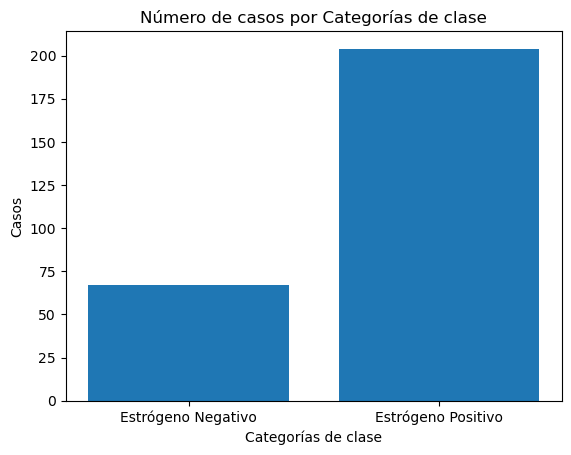

In [16]:
# Gráfica de barras de número de casos por categoría de clase (0 y 1)

# Plot
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Categorías de clase')
plt.ylabel('Casos')
plt.title('Número de casos por Categorías de clase')

# Personalizar las etiquetas del eje x
labels = ['Estrógeno Negativo', 'Estrógeno Positivo']
xticks = [0, 1]  # Ubicaciones correspondientes a las categorías
plt.xticks(xticks, labels)

plt.show()

Encontramos que existe un desbalance de clases por lo que podemos recurrir a hacer un "undersampling" o un "oversampling" de los datos para obtener una muestra balanceada o usar algúnos hiperparámetros como class_weight 'balanced' dentro del clasificador.

In [17]:
# Calcular el rango de valores máximos y mínimos en cada columna
rangos_max = data.max()
rangos_min = data.min()

# Crear un DataFrame con los resultados
rangos_df = pd.DataFrame({'Max': rangos_max, 'Min': rangos_min})
rangos_df = rangos_df.iloc[1:-1]

print(rangos_df)

                                Max        Min
1-hexadecanol             12.775977   7.781118
1-monostearin             14.368288   8.499212
1,2,4-benzenetriol        15.014075    6.81823
1,5-anhydroglucitol       15.474982   9.452769
2-aminoadipic,acid        14.312922   6.779435
...                             ...        ...
uric,acid                 15.556215   6.349034
uridine                    12.81781   5.918799
uridine-5'-monophosphate  12.325552   6.463437
valine                     19.66942  12.535361
xanthine                  12.919565   6.262644

[162 rows x 2 columns]


In [18]:
rangos_df.shape

(162, 2)

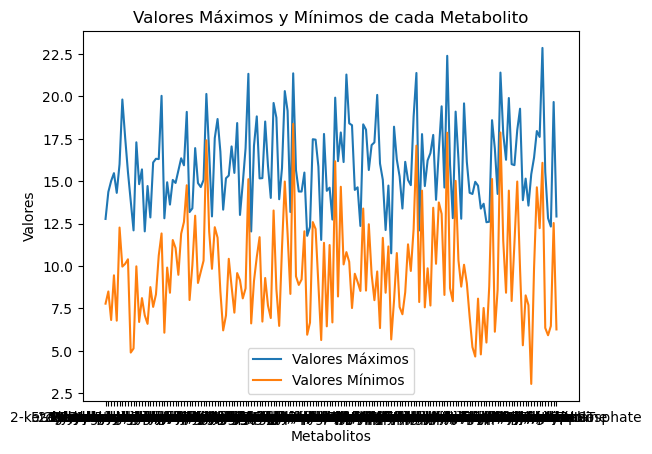

In [19]:
# Grafica de valores máximos y mínimos de cada metabolito

# PLot
plt.plot(rangos_df.index, rangos_df['Max'], label='Valores Máximos')
plt.plot(rangos_df.index, rangos_df['Min'], label='Valores Mínimos')
plt.xlabel('Metabolitos')
plt.ylabel('Valores')
plt.title('Valores Máximos y Mínimos de cada Metabolito')
plt.legend()
plt.show()

El rango de valores para todos los metabolitos no es muy grande (los valores son relativamente similares), por lo que podría no sernecesario un escalamiento de los datos.

# Clasificador SVM con escalamiento de datos

In [20]:
# Preparación de datos

# X = sólo datos de características de ejemplos
# Eliminamos la primera columna de 'case' para quedarnos sólo con los valores de los metabolitos
X_train = train_data.iloc[:, 1:]
X_test = test_data.iloc[:, 1:]

# Y = categorías de clase para cada ejemplo
Y_train = train_labels
Y_test = test_labels

In [21]:
# Escalamiento de datos

# Crear un escalador y ajustarlo a los datos de entrenamiento
scaler = StandardScaler()
scaler.fit(X_train)

# Aplicar el escalado a los datos de entrenamiento y prueba
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Entrenamiento del clasificador

# Inicializar una semilla
seed = 42
np.random.seed(seed)

# Creación del clasificador SVM
svm_model = SVC()

# Hiperparámetros que se desean ajustar
search_parameters = {'C': expon(scale=100), 'gamma': expon(scale=.1),
  'kernel': ['rbf'], 'class_weight':['balanced', None]}

# Búsqueda de hiperparámetros con RandomizedSearchCV  
clf = RandomizedSearchCV(svm_model, search_parameters, random_state=0, cv=15, 
                                    scoring='f1_weighted', verbose=2, n_jobs=-1)

# Ajuste del modelo a los datos de entrenamiento escalados
classifier = clf.fit(X_train_scaled, Y_train)

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
# Resultados de entrenamiento 
print("Mejor F-1 weighted score:")
print(classifier.best_score_)

# Resultados de cross-validation (clasificador)
print("Mejores hiperparámetros:")
print(classifier.best_params_)

Mejor F-1 weighted score:
0.8653953268263826
Mejores hiperparámetros:
{'C': 49.88720138545616, 'class_weight': None, 'gamma': 0.007368535491284788, 'kernel': 'rbf'}


In [24]:
# Evaluación del clasificador

# Predicciones en los datos de prueba usando el clasificador entrenado
Y_pred = classifier.predict(X_test_scaled)

# Resultados de la evaluación
print("Resultados de la evaluación:")
print("F-1 weighted: {}".format(f1_score(Y_test, Y_pred, average='weighted')))
print("Precision: {}".format(precision_score(Y_test, Y_pred)))
print("Recall: {}".format(f1_score(Y_test, Y_pred)))
print("AUROC: {}".format(roc_auc_score(Y_test, Y_pred, average='weighted')))

Resultados de la evaluación:
F-1 weighted: 0.851313897993215
Precision: 0.86
Recall: 0.924731182795699
AUROC: 0.7083333333333333


In [25]:
# Reporte de la clasificación de los datos de evaluación
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.86      1.00      0.92        43

    accuracy                           0.87        55
   macro avg       0.93      0.71      0.76        55
weighted avg       0.89      0.87      0.85        55



In [26]:
# Matriz de confusión
confusion_matrix = confusion_matrix(Y_test,Y_pred)
print("Matriz de confusión:")
print(confusion_matrix)

Matriz de confusión:
[[ 5  7]
 [ 0 43]]


Text(0.5, 0, 'False Positive Rate')

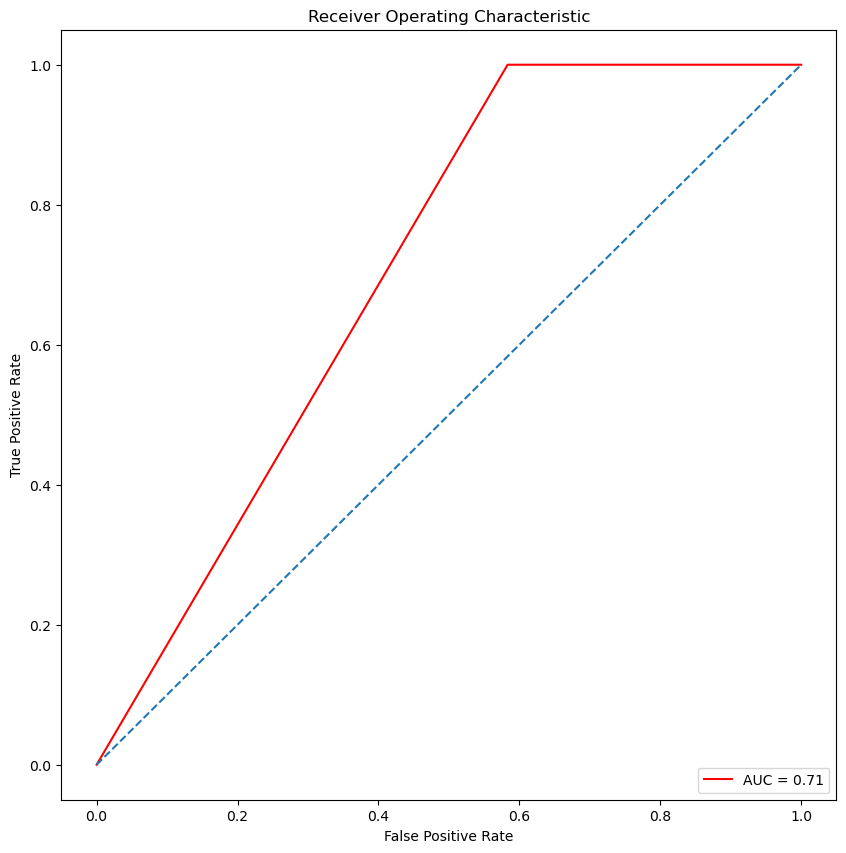

In [27]:
# Curva ROC

# Tasas de falsos positivos, verdaderos positivos y umbrales
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
# Calcular el área bajo la curva ROC (AUC-ROC) ponderada
auc_roc = roc_auc_score(Y_test, Y_pred, average='weighted')

# Plot
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % auc_roc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Clasificador SVM sin escalamiento de datos

In [28]:
# Entrenamiento del clasificador

# Inicializar una semilla
seed = 42
np.random.seed(seed)

# Creación del clasificador SVM
svm_model1 = SVC()

# Hiperparámetros que se desean ajustar
search_parameters = {'C': expon(scale=100), 'gamma': expon(scale=.1),
  'kernel': ['rbf'], 'class_weight':['balanced', None]}

# Búsqueda de hiperparámetros con RandomizedSearchCV  
clf1 = RandomizedSearchCV(svm_model1, search_parameters, random_state=0, cv=15, 
                                    scoring='f1_weighted', verbose=2, n_jobs=-1)

# Ajuste del modelo a los datos de entrenamiento sin escalar
classifier1 = clf1.fit(X_train, Y_train)

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
# Resultados de entrenamiento 
print("Mejor F-1 weighted score:")
print(classifier1.best_score_)

# Resultados de cross-validation (clasificador)
print("Mejores hiperparámetros:")
print(classifier1.best_params_)

Mejor F-1 weighted score:
0.8232611210880579
Mejores hiperparámetros:
{'C': 49.88720138545616, 'class_weight': None, 'gamma': 0.007368535491284788, 'kernel': 'rbf'}


In [30]:
# Evaluación del clasificador

# Predicciones en los datos de prueba usando el clasificador entrenado
Y_pred1 = classifier1.predict(X_test)

# Resultados de la evaluación
print("Resultados de la evaluación:")
print("F-1 weighted: {}".format(f1_score(Y_test, Y_pred1, average='weighted')))
print("Precision: {}".format(precision_score(Y_test, Y_pred1)))
print("Recall: {}".format(f1_score(Y_test, Y_pred1)))
print("AUROC: {}".format(roc_auc_score(Y_test, Y_pred1, average='weighted')))

Resultados de la evaluación:
F-1 weighted: 0.8088321545627049
Precision: 0.84
Recall: 0.9032258064516129
AUROC: 0.6550387596899225


In [31]:
# Reporte de la clasificación de los datos de evaluación
print(classification_report(Y_test,Y_pred1))

              precision    recall  f1-score   support

           0       0.80      0.33      0.47        12
           1       0.84      0.98      0.90        43

    accuracy                           0.84        55
   macro avg       0.82      0.66      0.69        55
weighted avg       0.83      0.84      0.81        55



In [32]:
# Matriz de confusión

from sklearn.metrics import confusion_matrix

confusion_matrix1 = confusion_matrix(Y_test,Y_pred1)
print("Matriz de confusión:")
print(confusion_matrix1)

Matriz de confusión:
[[ 4  8]
 [ 1 42]]


Text(0.5, 0, 'False Positive Rate')

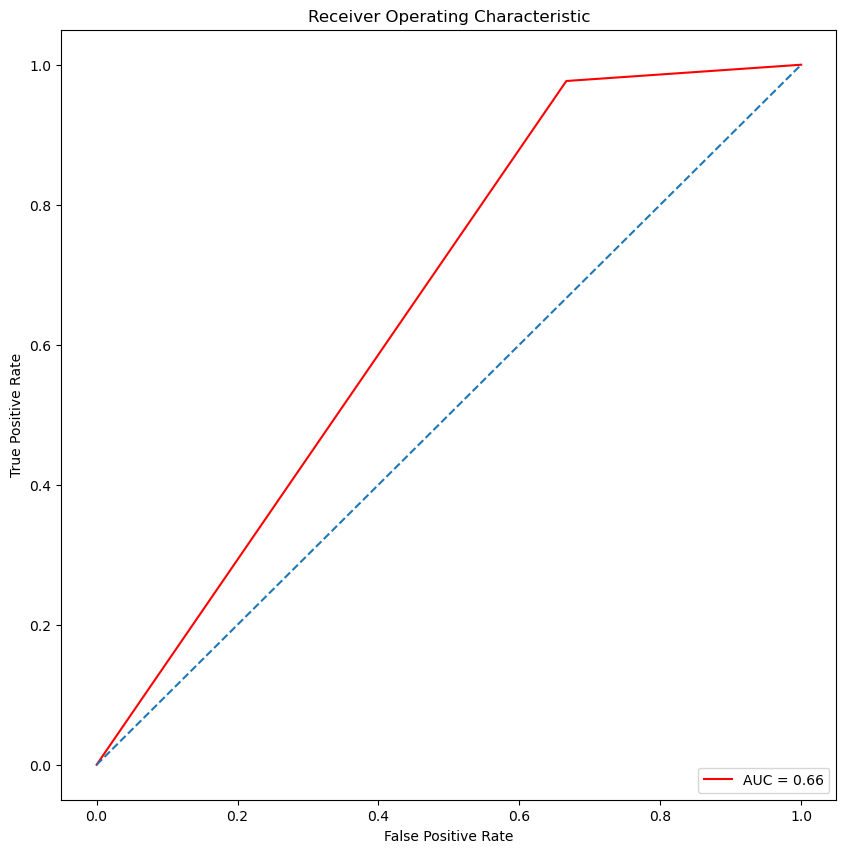

In [33]:
# Curva ROC

# Tasas de falsos positivos, verdaderos positivos y umbrales
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred1)
# Calcular el área bajo la curva ROC (AUC-ROC) ponderada
auc_roc1 = roc_auc_score(Y_test, Y_pred1, average='weighted')

# Plot
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % auc_roc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Undersampling 

In [34]:
# Submuestreo de los datos de entrenamiento escalados
rus = RandomUnderSampler(random_state=0)

X_train_resampled, Y_train_resampled = rus.fit_resample(X_train_scaled, Y_train)

In [35]:
## Entrenamiento del clasificador

# Inicializar una semilla
seed = 42
np.random.seed(seed)

# Creación del clasificador SVM
svm_model_us = SVC()

# Hiperparámetros que se desean ajustar
search_parameters = {'C': expon(scale=100), 'gamma': expon(scale=.1),
  'kernel': ['rbf'], 'class_weight':[None]}

# Búsqueda de hiperparámetros con RandomizedSearchCV  
clf_us = RandomizedSearchCV(svm_model_us, search_parameters, random_state=0, cv=15, 
                                    scoring='f1_weighted', verbose=2, n_jobs=-1)

# Ajuste del modelo a los datos de entrenamiento escalados
classifier_us = clf_us.fit(X_train_resampled, Y_train_resampled)

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
# Resultados de entrenamiento 
print("Mejor F-1 weighted score:")
print(classifier_us.best_score_)

# Resultados de cross-validation (clasificador)
print("Mejores hiperparámetros:")
print(classifier_us.best_params_)

Mejor F-1 weighted score:
0.774021164021164
Mejores hiperparámetros:
{'C': 7.368535491284788, 'class_weight': None, 'gamma': 0.009116102911900048, 'kernel': 'rbf'}


In [37]:
# Evaluación del clasificador

# Predicciones en los datos de prueba usando el clasificador entrenado
Y_pred_us = classifier_us.predict(X_test_scaled)

# Resultados de la evaluación
print("Resultados de la evaluación:")
print("F-1 weighted: {}".format(f1_score(Y_test, Y_pred_us, average='weighted')))
print("Precision: {}".format(precision_score(Y_test, Y_pred_us)))
print("Recall: {}".format(f1_score(Y_test, Y_pred_us)))
print("AUROC: {}".format(roc_auc_score(Y_test, Y_pred_us, average='weighted')))

Resultados de la evaluación:
F-1 weighted: 0.8267342413683878
Precision: 0.9230769230769231
Recall: 0.878048780487805
AUROC: 0.7936046511627908


In [38]:
# Reporte de la clasificación de los datos de evaluación
print(classification_report(Y_test,Y_pred_us))

              precision    recall  f1-score   support

           0       0.56      0.75      0.64        12
           1       0.92      0.84      0.88        43

    accuracy                           0.82        55
   macro avg       0.74      0.79      0.76        55
weighted avg       0.84      0.82      0.83        55



In [39]:
# Matriz de confusión

from sklearn.metrics import confusion_matrix

confusion_matrix_us = confusion_matrix(Y_test,Y_pred_us)
print("Matriz de confusión:")
print(confusion_matrix_us)

Matriz de confusión:
[[ 9  3]
 [ 7 36]]


Text(0.5, 0, 'False Positive Rate')

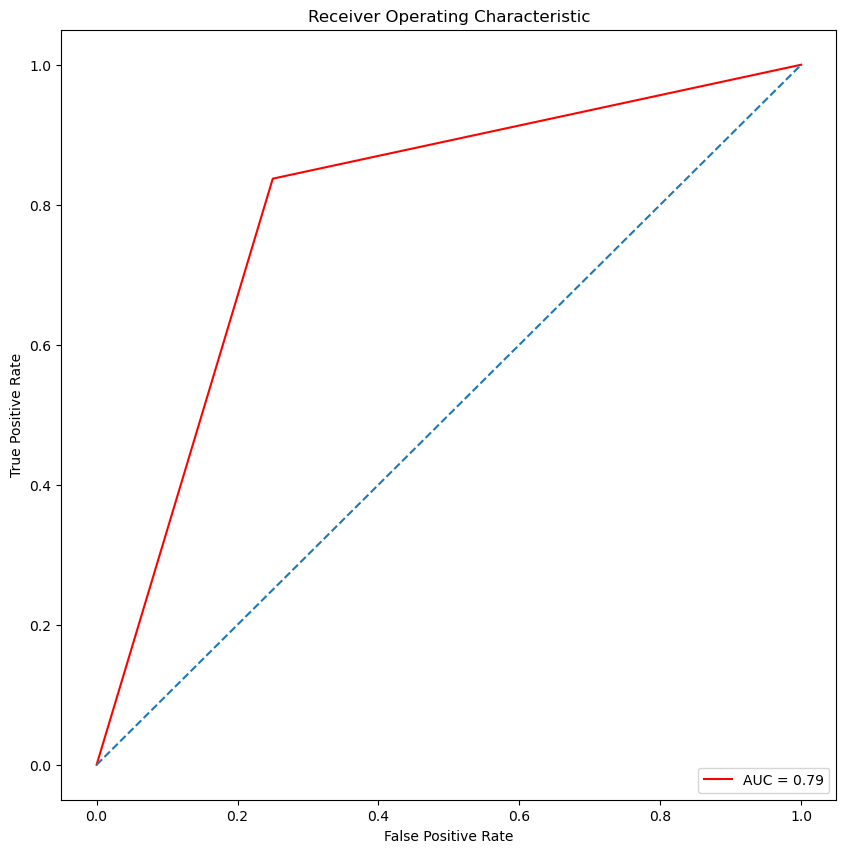

In [40]:
# Curva ROC

# Tasas de falsos positivos, verdaderos positivos y umbrales
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred_us)
# Calcular el área bajo la curva ROC (AUC-ROC) ponderada
auc_roc_us = roc_auc_score(Y_test, Y_pred_us, average='weighted')

# Plot
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % auc_roc_us)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')